In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df_train = pd.read_csv('./Google_Stock_Price_Train.csv')
df_test = pd.read_csv('./Google_Stock_Price_Test.csv')

In [3]:
df_train.head(5)

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
train = df_train['Open']
train.head(5)

0    325.25
1    331.27
2    329.83
3    328.34
4    322.04
Name: Open, dtype: float64

In [10]:
train_set = train.to_numpy()
print('Shape:',train_set.shape)

Shape: (1509,)


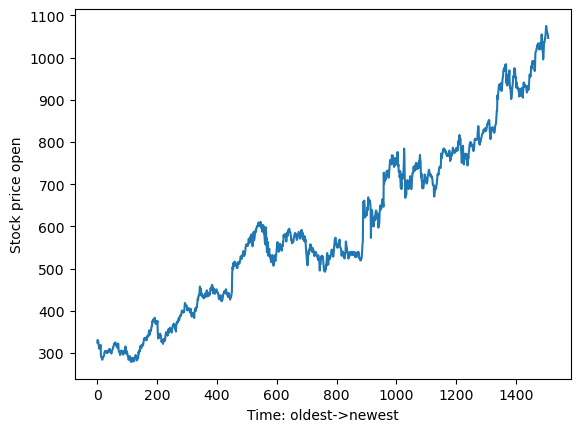

In [12]:
plt.figure()
plt.plot(train_set)
plt.ylabel('Stock price open')
plt.xlabel('Time: oldest->newest')
plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler
#
train_set = train_set.reshape(-1,1)
# print(train_set)

scalar = MinMaxScaler(feature_range=(0,1))
train_scaled = scalar.fit_transform(train_set)
print('Data:',train_scaled[0:60,0])
print("Shape:",train_scaled.shape)

Data: [0.05794644 0.0655085  0.06369963 0.06182796 0.05391418 0.04343785
 0.03953121 0.04435484 0.04125214 0.04483218 0.04147825 0.05047232
 0.01889257 0.01606623 0.01626721 0.01075269 0.0072857  0.00653201
 0.01109185 0.01418199 0.01540046 0.01535022 0.01898051 0.0216938
 0.02929354 0.0302231  0.032346   0.02975832 0.03139132 0.03204452
 0.03291127 0.02658024 0.02793689 0.02724601 0.03230831 0.02920561
 0.02941916 0.02894182 0.03107728 0.03645362 0.03875239 0.03858909
 0.03760929 0.02985881 0.03048689 0.0311024  0.029796   0.02482163
 0.03029846 0.03420511 0.03521003 0.0378982  0.03929254 0.04416642
 0.04647774 0.04891468 0.05397699 0.05298463 0.05425334 0.05738117]
Shape: (1509, 1)


In [23]:
x_train = []
y_train = []
for i in range(60,len(train_scaled)):
    x_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train)
print(y_train)

[[0.05794644 0.0655085  0.06369963 ... 0.05298463 0.05425334 0.05738117]
 [0.0655085  0.06369963 0.06182796 ... 0.05425334 0.05738117 0.05826048]
 [0.06369963 0.06182796 0.05391418 ... 0.05738117 0.05826048 0.05720531]
 ...
 [0.85526583 0.84775405 0.85152251 ... 0.98712441 0.98230082 0.97848205]
 [0.84775405 0.85152251 0.84962571 ... 0.98230082 0.97848205 0.97762796]
 [0.85152251 0.84962571 0.86370723 ... 0.97848205 0.97762796 0.97035477]]
[0.05826048 0.05720531 0.05033414 ... 0.97762796 0.97035477 0.96422472]


In [24]:
print('X_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)

X_train shape: (1449, 60)
y_train shape: (1449,)


In [25]:
#reshape to add indicator
x_train = np.reshape(x_train, newshape = 
                     (x_train.shape[0], x_train.shape[1], 1))
print(x_train)

[[[0.05794644]
  [0.0655085 ]
  [0.06369963]
  ...
  [0.05298463]
  [0.05425334]
  [0.05738117]]

 [[0.0655085 ]
  [0.06369963]
  [0.06182796]
  ...
  [0.05425334]
  [0.05738117]
  [0.05826048]]

 [[0.06369963]
  [0.06182796]
  [0.05391418]
  ...
  [0.05738117]
  [0.05826048]
  [0.05720531]]

 ...

 [[0.85526583]
  [0.84775405]
  [0.85152251]
  ...
  [0.98712441]
  [0.98230082]
  [0.97848205]]

 [[0.84775405]
  [0.85152251]
  [0.84962571]
  ...
  [0.98230082]
  [0.97848205]
  [0.97762796]]

 [[0.85152251]
  [0.84962571]
  [0.86370723]
  ...
  [0.97848205]
  [0.97762796]
  [0.97035477]]]


In [26]:
x_train.shape

(1449, 60, 1)

In [27]:
model = tf.keras.Sequential()

In [28]:
#add LSTM layers
model.add(tf.keras.layers.LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.LSTM(units=50,return_sequences=True))
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.LSTM(units=50,return_sequences=True))
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.LSTM(units=50,return_sequences=False))
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(units=1))

In [29]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [30]:
model.fit(x=x_train, y=y_train, batch_size=32,epochs=100)

Epoch 1/100
46/46 [==============================] - 10s 24ms/step - loss: 0.0238
Epoch 2/100
46/46 [==============================] - 1s 20ms/step - loss: 0.0040
Epoch 3/100
46/46 [==============================] - 1s 20ms/step - loss: 0.0033
Epoch 4/100
46/46 [==============================] - 1s 20ms/step - loss: 0.0031
Epoch 5/100
46/46 [==============================] - 1s 19ms/step - loss: 0.0034
Epoch 6/100
46/46 [==============================] - 1s 19ms/step - loss: 0.0032
Epoch 7/100
46/46 [==============================] - 1s 19ms/step - loss: 0.0029
Epoch 8/100
46/46 [==============================] - 1s 19ms/step - loss: 0.0028
Epoch 9/100
46/46 [==============================] - 1s 20ms/step - loss: 0.0026
Epoch 10/100
46/46 [==============================] - 1s 19ms/step - loss: 0.0026
Epoch 11/100
46/46 [==============================] - 1s 19ms/step - loss: 0.0029
Epoch 12/100
46/46 [==============================] - 1s 19ms/step - loss: 0.0028
Epoch 13/100
46/46 [====

46/46 [==============================] - 1s 20ms/step - loss: 9.4146e-04


In [31]:
print(df_test.head(5))

         Date         Open         High          Low        Close   Volume
0  02/01/2018  1048.339966  1066.939941  1045.229980  1065.000000  1237600
1  03/01/2018  1064.310059  1086.290039  1063.209961  1082.479980  1430200
2  04/01/2018  1088.000000  1093.569946  1084.001953  1086.400024  1004600
3  05/01/2018  1094.000000  1104.250000  1092.000000  1102.229980  1279100
4  08/01/2018  1102.229980  1111.270020  1101.619995  1106.939941  1047600


In [32]:
print(df_test.shape)

(125, 6)


In [34]:
test = df_test['Open']
test.head(5)

0    1048.339966
1    1064.310059
2    1088.000000
3    1094.000000
4    1102.229980
Name: Open, dtype: float64

In [35]:
test_set = test.to_numpy()
print('Shape:',test_set.shape)

Shape: (125,)


In [38]:
dataset_total = pd.concat((df_train['Open'], df_test['Open']), 
                          axis = 0)
print('Len total:',len(dataset_total))
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(df_test) - 60:].values
print('Inputs:',inputs)
print('Len Inputs:',len(inputs))

Len total: 1634
Inputs: [ 955.48999   966.700012  980.        980.        973.719971  987.450012
  992.        992.099976  990.289978  991.77002   986.        989.440002
  989.52002   970.        968.369995  980.       1009.190002 1014.
 1015.219971 1017.210022 1021.76001  1022.109985 1028.98999  1027.27002
 1030.52002  1033.98999  1026.459961 1023.419983 1022.590027 1019.210022
 1022.52002  1034.01001  1020.26001  1023.309998 1035.       1035.869995
 1040.       1055.089966 1042.680054 1022.369995 1015.799988 1012.659973
  995.940002 1001.5      1020.429993 1037.48999  1035.5      1039.630005
 1046.119995 1045.       1054.609985 1066.079956 1075.199951 1071.780029
 1064.949951 1061.109985 1058.069946 1057.390015 1051.599976 1046.719971
 1048.339966 1064.310059 1088.       1094.       1102.22998  1109.400024
 1097.099976 1106.300049 1102.410034 1132.51001  1126.219971 1131.410034
 1131.829956 1137.48999  1159.849976 1177.329956 1172.530029 1175.079956
 1176.47998  1167.829956 1170.5699

In [40]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)

#scale input
inputs = scalar.transform(inputs)

In [41]:
len(inputs)

185

In [42]:
x_test = []
for i in range(60, len(inputs)):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
#add dimension of indicator
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [44]:
len(x_test)

125

In [46]:
y_test = []
for i in range(60,len(inputs)):
  y_test.append(inputs[i,0])
y_test = np.array(y_test)
print(y_test)

[0.96625969 0.98632061 1.01607885 1.02361578 1.03395391 1.0429606
 1.02750983 1.03906655 1.03418009 1.07199033 1.06408907 1.07060859
 1.07113608 1.07824596 1.10633357 1.12829114 1.12226169 1.12546479
 1.12722344 1.11635767 1.11979952 1.10980057 1.05878813 1.01934482
 0.93967955 1.00796413 0.97514079 0.92720587 0.96583264 0.96206417
 0.96702593 1.00486131 1.01659391 1.0193071  1.03928    1.05148979
 1.04703053 1.06607389 1.08295654 1.060082   1.04103865 0.97221385
 0.99992471 1.03017287 1.0175736  1.05039694 1.0763743  1.11135819
 1.11908358 1.08794344 1.09391018 1.09916097 1.05628839 1.02989656
 1.02203301 1.00839118 0.9646142  0.96332033 0.98467497 0.90302488
 0.92014628 0.93420266 0.92301027 0.89725909 0.95745403 0.93066029
 0.92664058 0.93874986 0.94069696 0.93699136 0.95688882 0.95201493
 0.97006588 1.00280136 0.99271439 1.00854192 1.00334142 0.97085726
 0.93759429 0.94260634 0.96332033 0.94323442 0.92269623 0.94083512
 0.92940414 0.92676624 0.96737768 0.97907256 0.97851978 1.01360

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
predicted_stock_price = model.predict(x_test)
mse = mean_squared_error(y_test, predicted_stock_price[:,0])
mae = mean_absolute_error(y_test,predicted_stock_price[:,0])
print('MSE: %f' % mse)
print('MAE: %f' % mae)

4/4 [==============================] - 0s 45ms/step
MSE: 0.003887
MAE: 0.055225


In [49]:
#inverse 
predicted_stock_price = scalar.inverse_transform(predicted_stock_price)

In [ ]:
##visualize the prediction and real price
plt.plot(rea, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()